<a href="https://colab.research.google.com/github/scab-unam/dam_COVID-19/blob/damCOVID19_curandero/dinamicaEpidemiologica_pSIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dinámica epidemiológica de enfermedades infecciosas: evolución básica
## Marco Arieli Herrera-Valdez
### Laboratorio de Fisiología de Sistemas, Departamento de Matemáticas, Facultad de Ciencias, UNAM

Última modificación: 20201219, MAHV

In [2]:
import numpy as np
import numpy.random as rd
import matplotlib.pylab as pl

## Modelo simple de dinámica aleatoria epidemiológica macroscópica (pSIN)

Suponga que la población en un tiempo $t$ está dividida en 3 subconjuntos de personas _no susceptibles_ _susceptibles_, e _infectadas_, por un patógeno (e.g. SARS-CoV-2). Suponga que los tamaños de los tres subconjuntos están representados por las variables $N$, $S$, y $I$, respectivamente. Sea $T(t) = S(t)+I(t)+N(t)$ el tamaño total de la población en tiempo $t$.  Suponga que para cada tiempo $t$ sólo una fracción $\varepsilon(t)$ de individuos susceptibles está expuesta al patógeno y que las infecciones entre individuos ocurren de manera independiente, con el mismo inóculo promedio por infección. La probabilidad de infección, $p$, depende entonces del número de infectados y de la exposición de los infectados. 
Los individuos dejan de estar infectados después de un tiempo promedio $\tau$. Por el momento, supondremos que no hay decesos por infección y que los recuperados no vuelven a infectarse y por tanto, se vuelven parte del gupo de no suceptibles. 


Los individuos recien infectados y recién recuperados en cada momento son variables aleatorias. El número de nuevos infectados se puede pensar como resultado de un muestreo entre los susceptibles expuestos que depende de su probabilidad de ser inoculados e infectados con el patógeno, y de la cantidad de infectados distribuyendo inóculo en el ambiente. Con base en la hipótesis de independencia entre las infecciones, se puede entonces suponer que cada infección es un ensayo Bernoulli con probabilidad de éxito $p$, y que el número de infectados es entonces una variable aleatoria binomial con número de ensayos igual a $\lfloor \varepsilon S \rfloor$.


### Epidemiología sin decesos
Los recien recuperados también se pueden pensar como resultado de un muestreo entre los infectados con una probabilidad de recuperación que depende directamente de la probabilidad de que haya al menos una recuperación en un intervalo de longitud $\delta/\tau$ (ver distribución acumulada de variables aleatorias gamma en para el caso en el que el parámetro de forma es discreto y su relación con variables Poisson, Hoel, Port, Stone, 173, pg. 128).  

 Los individuos recién recuperados en el tiempo $t$ también se pueden pensar como una variable aleatoria binomial con número de ensayos igual a $I(t)$, y 
$$
q= P( \textrm{al menos una recuperación en un tiempo }\delta) = 1 - \exp(-\delta/\tau) 
$$ 
La dinámica epidemiológica poblacional se puede entonces describir como en términos de la evolución de la tripleta $(S,I,N)$ de acuerdo con
\begin{eqnarray}
S(t+\delta) &=& S(t) - X(t)
\\
I(t+\delta) &=& I(t) + X(t) - Y(t)
\\
N(t+\delta) &=& Y(t)
\end{eqnarray}
con $X \sim Bin(\lfloor \varepsilon S \rfloor, p)$ y $Y\sim Bin(I,q)$.

In [3]:
# Función para producir la dinámica de evolución en cada paso en el tiempo
def SIN(p,S=100, I=1, N=10): 
    T = S+I+N
    expS = np.floor(p['epsilonS']*S) ; #print(expS)
    prev = I/T; #print('Prev = {}'.format(prev))
    pInf = p['delta'] * p['epsilonS'] * p['beta'] * prev
    pRec = 1 - np.exp(-p['delta']/p['tau'])
    X= rd.binomial(expS,pInf)
    Y= rd.binomial(I,pRec)
    return X,Y,pInf, pRec

In [4]:
# Chequeo de la función SIN
p={'beta':0.5,'epsilonS':0.5,'tau':21.0,'delta':1,'S0':100,'I0':10,'N0':10, 'delta':1.0,'nDays':200}
SIN(p, S=p['S0'], I=p['I0'], N=p['N0'])

(2, 1, 0.020833333333333332, 0.04650304516652326)

In [5]:
# Iteración para observar la dinámica de la función SIN
def iterSIN(p):
    p['nSteps']= np.int32(p['nDays']/p['timeStep'])
    S= np.zeros(p['nSteps'])
    I= np.zeros(p['nSteps'])
    N= np.zeros(p['nSteps'])
    pInfection= np.zeros(p['nSteps'])
    pRecovery= np.zeros(p['nSteps'])
    S[0],I[0],N[0]=p['S0'],p['I0'],p['N0']
    for nn in range(1,p['nSteps']):
        X,Y,pInf,pRec = SIN(p,S=S[nn-1],I=I[nn-1],N=N[nn-1])
        S[nn] = S[nn-1] - X
        I[nn] = I[nn-1] + X -Y
        N[nn] = N[nn-1] + Y
        pInfection[nn] = pInf
        pRecovery[nn] = pRec
    return S,I,N,pInfection,pRecovery


        

### Dinámica de (S,I,N)

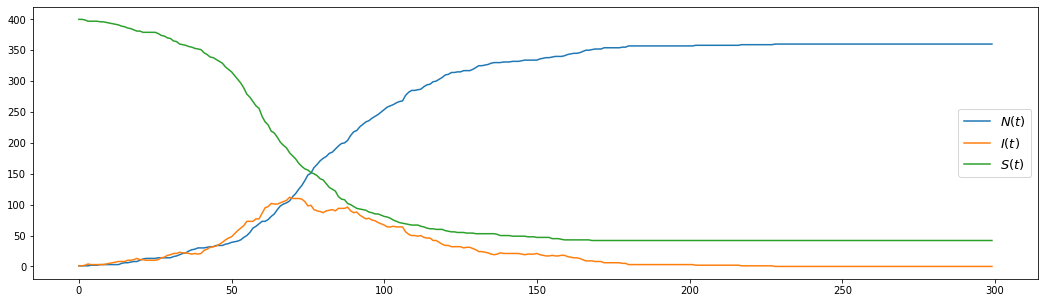

In [28]:
p={'beta':0.5,'epsilonS':0.5,'tau':21.0,'delta':1,'S0':400,'I0':1,'N0':1, 'timeStep':1.0/1.0,'nDays':300}
timeSamples = np.arange(0,p['nDays'],p['timeStep'])
S,I,N,pInfect,pRecov = iterSIN(p)
f0 = pl.figure(figsize=(18,5))
pl.plot(N,label=r'$N(t)$')
pl.plot(I,label=r'$I(t)$')
pl.plot(S,label=r'$S(t)$')
pl.legend(fontsize=13)


Evolución de las distribuciones de probabilidad de infección